In [58]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_blobs
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering 
from sklearn.metrics import silhouette_score
from sklearn.cluster import Birch
from sklearn. metrics import silhouette_score
from sklearn. metrics import calinski_harabasz_score
from sklearn. metrics import davies_bouldin_score
import numpy as np
from scipy.spatial.distance import pdist, squareform
import openpyxl


In [2]:
# Load the data
df = pd.read_excel('EEU11 Final for thesis 2024.xlsx')

In [3]:
# Select the feature for clustering
x = df.iloc[:,1:].values

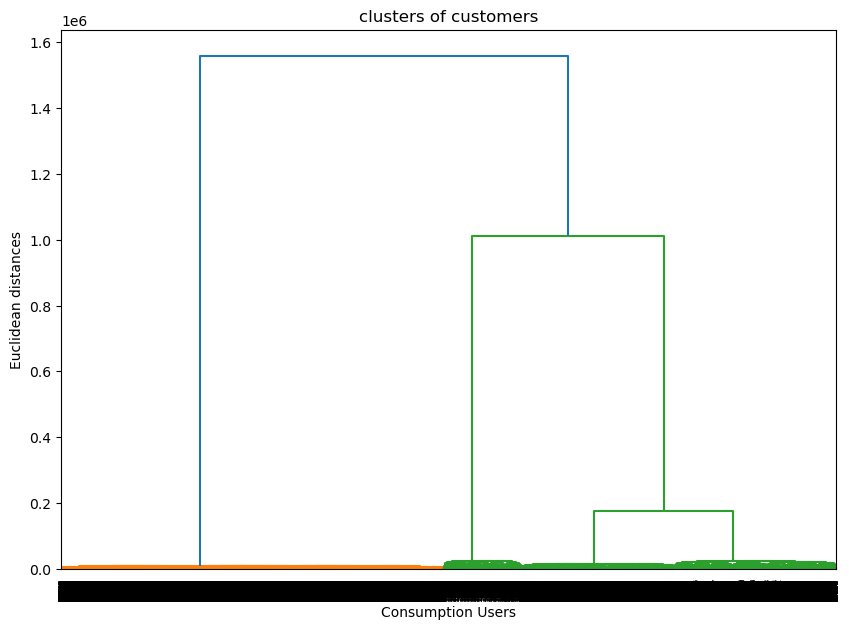

In [4]:
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(x, method='ward'))
plt.title('clusters of customers')
plt.xlabel('Consumption Users') 
plt.ylabel('Euclidean distances')
plt.show()

In [5]:
#predict the actual clustring 
#cluster = AgglomerativeClustering (n_clusters=3, affinity = 'euclidean', linkage='ward')
cluster = AgglomerativeClustering (n_clusters=3, linkage='ward')
cluster.fit_predict(x)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [6]:
c1 = cluster.fit_predict(x)

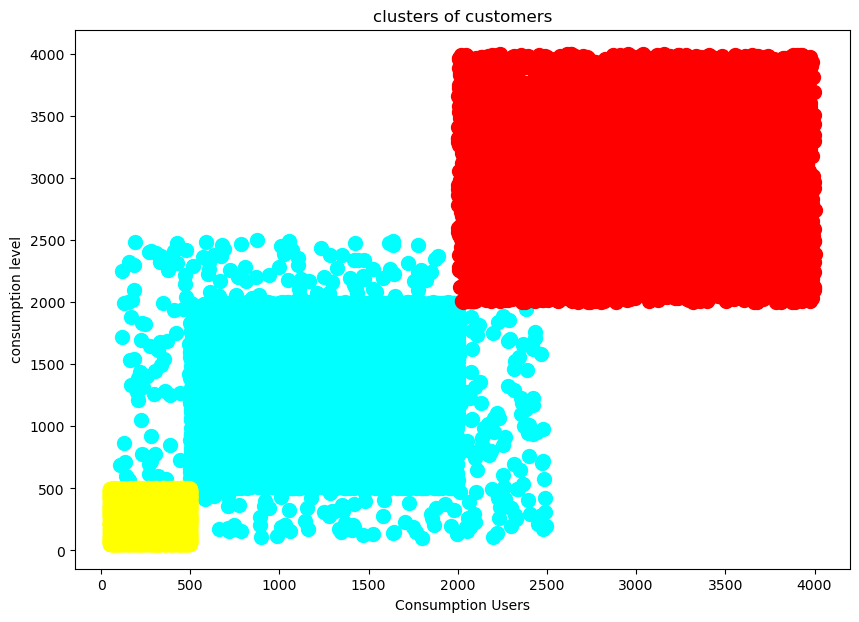

In [7]:
plt.figure(figsize=(10,7))
plt.scatter(x[c1 ==0,0], x[c1 == 0,1], s= 100, c='cyan', label = 'Cluster 1')
plt.scatter(x[c1 ==1,0], x[c1 == 1,1], s= 100, c='Yellow', label = 'Cluster 2')
plt.scatter(x[c1 ==2,0], x[c1 == 2,1], s= 100, c='red', label = 'Cluster 3')
plt.title('clusters of customers')
plt.xlabel('Consumption Users') 
plt.ylabel('consumption level')
plt.show()

In [8]:
# Evaluate Agglomerative Clustering
agglomerative_silhouette = silhouette_score(x, c1)
agglomerative_davies_bouldin = davies_bouldin_score(x, c1)
agglomerative_calinski_harabasz = calinski_harabasz_score(x, c1)

In [9]:
print("Agglomerative Clustering - Silhouette Score:", agglomerative_silhouette)
print("Agglomerative Clustering - Davies-Bouldin Index:", agglomerative_davies_bouldin)
print("Agglomerative Clustering - Calinski-Harabasz Index:", agglomerative_calinski_harabasz)

Agglomerative Clustering - Silhouette Score: 0.6801676496929757
Agglomerative Clustering - Davies-Bouldin Index: 0.5550477402004416
Agglomerative Clustering - Calinski-Harabasz Index: 168148.84357929236


In [10]:
#try to KMEANS 

In [ ]:
from sklearn.cluster import KMeans
individual_clustering_score = []
for i in range(1, 15):
        kmeans = KMeans(n_clusters = i, init = 'random', random_state = 200)
        kmeans.fit(x)
        individual_clustering_score.append(kmeans.inertia_)
        
        
plt.figure(figsize=(10,6))
plt.plot(range(1, 15), individual_clustering_score)
plt.title('clusters of customers')
plt.xlabel('Consumption Users') 
plt.ylabel('clustering score')
plt.show()

In [39]:
#fit the model and pridect
kmeans= KMeans(n_clusters = 3, random_state = 200)


kmeans.fit(x)


pred = kmeans.predict(x)


pred

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 2, 2, ..., 2, 2, 2])

In [40]:
cat = []
correct = 0
for i in range(len(x)):
    predict_me = np.array(x[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = kmeans.predict(predict_me)
    cat.append(prediction[0])
   # if prediction[0] == pred[i]:
       # correct += 1
        
#print(correct/len(X))
print(cat)

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 

In [41]:
centroids = kmeans.cluster_centers_

In [42]:
kmeansmodel = KMeans(n_clusters = 3, init='k-means++', random_state=200)

In [43]:
y_kmeans = kmeansmodel.fit_predict(x)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


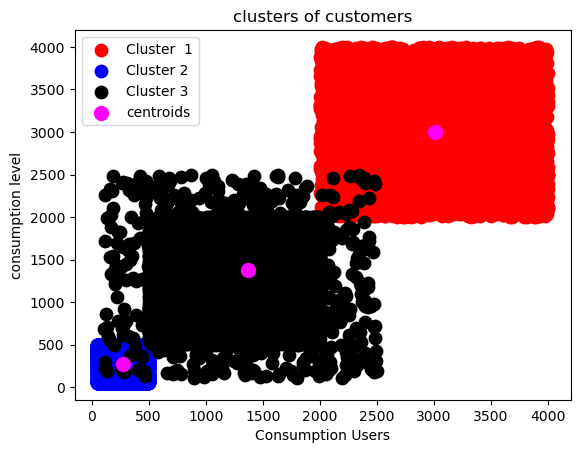

In [44]:
plt.scatter(x[y_kmeans == 0,0], x[y_kmeans == 0,1], s=80, c="red", label='Cluster  1')
plt.scatter(x[y_kmeans == 1,0], x[y_kmeans == 1,1], s=80, c="Blue", label='Cluster 2')
plt.scatter(x[y_kmeans == 2,0], x[y_kmeans == 2,1], s=80, c="Black", label='Cluster 3')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],s=100,c='magenta', label='centroids')
plt.title('clusters of customers')
plt.xlabel('Consumption Users') 
plt.ylabel('consumption level')
plt.legend()
plt.show()

In [45]:
# Evaluate K-means Clustering
kmeans_silhouette = silhouette_score(x, pred)
kmeans_davies_bouldin = davies_bouldin_score(x, pred)
kmeans_calinski_harabasz = calinski_harabasz_score(x, pred)

In [46]:
print("K-means Clustering - Silhouette Score:", kmeans_silhouette)
print("K-means Clustering - Davies-Bouldin Index:", kmeans_davies_bouldin)
print("K-means Clustering - Calinski-Harabasz Index:", kmeans_calinski_harabasz)

K-means Clustering - Silhouette Score: 0.6801676580948387
K-means Clustering - Davies-Bouldin Index: 0.555047717366348
K-means Clustering - Calinski-Harabasz Index: 168148.84964841112


In [20]:
#try BIRCH

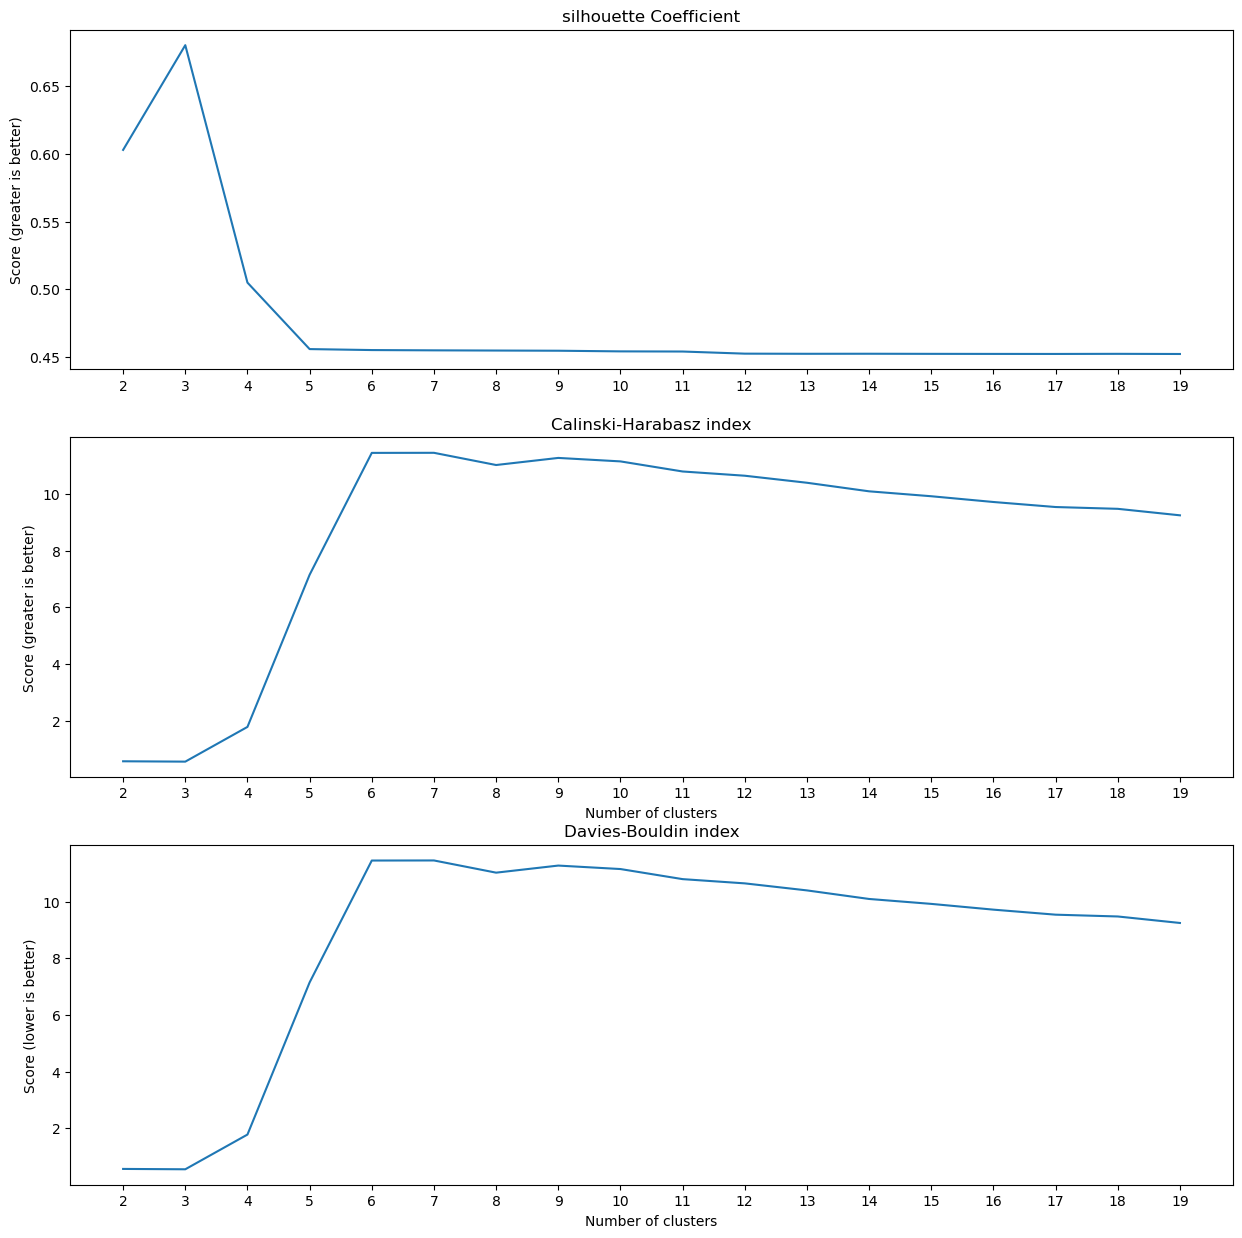

In [21]:
# Create a BIRCH clustering model
sum_of_squared_dista1nces = []
sscore = []
chscore = []
dbscore = []

ks = np.arange(2, 20)
for k in ks:
    brc = Birch(n_clusters=k).fit(x)
    #evaluate Silhoutte score
    sscore.append(silhouette_score(x, brc.labels_))
    #Evaluate Calinski-Harabsz index
    chscore.append(davies_bouldin_score(x, brc.labels_))
    #evaluate davies-bouldin index
    dbscore.append(davies_bouldin_score(x,brc.labels_))
#fig2, ax25 = plt.subplots(1), figsize=(10,10)
fig, axs = plt.subplots((3), figsize=(15,15))
'''
axs[0][0].plot(ks, sum_of_squared_distances)
axs[0][0].set_xlabel('number of clusters')
axs[0][0].set_ylabel('sum of squared distances(lower is better)')
axs[0][0].set_title('elbow method')
axs[0][0].set_xtricks(ks)
'''

axs[0].plot(ks, sscore)
axs[0].set_xlabel
axs[0].set_ylabel('Score (greater is better)')
axs[0].set_title('silhouette Coefficient')
axs[0].set_xticks(ks)



axs[1].plot(ks, chscore)
axs[1].set_xlabel('Number of clusters')
axs[1].set_ylabel('Score (greater is better)')
axs[1].set_title('Calinski-Harabasz index')
axs[1].set_xticks(ks)


axs[2].plot(ks, dbscore)
axs[2].set_xlabel('Number of clusters')
axs[2].set_ylabel('Score (lower is better)')
axs[2].set_title('Davies-Bouldin index')
axs[2].set_xticks(ks)
plt.savefig('Birch.png')
plt.show()

In [22]:
brc = Birch(n_clusters=3).fit(x)
dft = df
dft['cluster'] = brc.labels_
brc = Birch()
labels = brc.fit_predict(x)


In [23]:
birch = Birch(n_clusters=3)
birch.fit_predict(x)  


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [24]:
# Evaluate Birch Clustering
birch_silhouette = silhouette_score(x, labels)
birch_davies_bouldin = davies_bouldin_score(x, labels)
birch_calinski_harabasz = calinski_harabasz_score(x, labels)

In [25]:
print("Birch Clustering - Silhouette Score:", birch_silhouette)
print("Birch Clustering - Davies-Bouldin Index:", birch_davies_bouldin)
print("Birch Clustering - Calinski-Harabasz Index:", birch_calinski_harabasz)

Birch Clustering - Silhouette Score: 0.6801676496929757
Birch Clustering - Davies-Bouldin Index: 0.5550477402004416
Birch Clustering - Calinski-Harabasz Index: 168148.84357929236


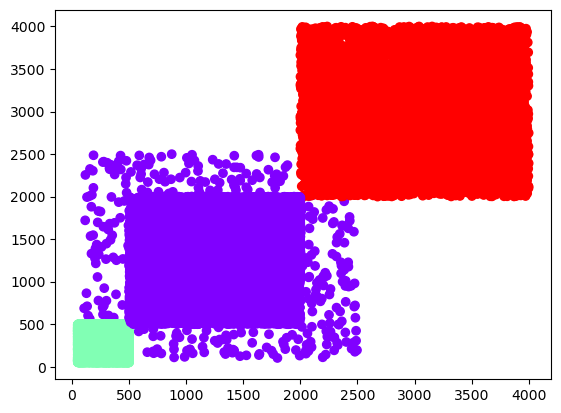

In [26]:
plt.scatter(x[:, 0], x[:, 1], c=labels, cmap='rainbow')
plt.show()

In [37]:
x = df.iloc[:,1:].values
# K-means Clustering
kmeans = KMeans(n_clusters=3, random_state=200)
kmeans.fit(x)
kmeans_labels = kmeans.labels_
dunn_index_kmeans = dunn_index(x)

# Update data matrix with K-means labels
x = np.column_stack((x, kmeans_labels))

# Agglomerative Clustering (Ward's linkage)
ward = AgglomerativeClustering(n_clusters=3, linkage='ward')
ward.fit(x)
ward_labels = ward.labels_
dunn_index_ward = dunn_index(x)

# Update data matrix with Agglomerative labels
x = np.column_stack((x, ward_labels))

# Birch Clustering
birch = Birch(n_clusters=3)
birch.fit(x)
birch_labels = birch.labels_
dunn_index_birch = dunn_index(x)

# Print the results
print("K-means Clustering:")
print("  Dunn Index:", dunn_index_kmeans)

print("\nAgglomerative Clustering:")
print("  Dunn Index:", dunn_index_ward)

print("\nBirch Clustering:")
print("  Dunn Index:", dunn_index_birch)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K-means Clustering:
  Dunn Index: 0.02827707227376268

Agglomerative Clustering:
  Dunn Index: 0.02827707224430521

Birch Clustering:
  Dunn Index: 0.02827707221484773


In [67]:
# Create a BIRCH model
birch = Birch(n_clusters=3)

  # Fit the model to the data
birch.fit(x)

  # Get cluster labels
cluster_labels = birch.labels_

  # Create an Excel workbook
wb = openpyxl.Workbook()
sheet = wb.active
sheet.title = "BIRCH Clustering Results"

  # Write headers for data points and cluster labels
sheet.cell(row=1, column=1).value = "Data Point Index"
sheet.cell(row=1, column=2).value = "Cluster Label"

  # Write data points and corresponding cluster labels
for i, label in enumerate(cluster_labels):
    sheet.cell(row=i+2, column=1).value = i  # Data point index
    sheet.cell(row=i+2, column=2).value = label

  # Save the Excel file
hana = "birch_clustering_results.xlsx" 
wb.save(hana)
output_dir = "C:/Users/Administrator"  # Replace with your desired directory path
hana = f"{output_dir}birch_clustering_results.xlsx"
wb.save(hana)

print(f"BIRCH clustering results saved to '{hana}'.")

BIRCH clustering results saved to 'C:/Users/Administratorbirch_clustering_results.xlsx'.
